In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv(r"D:\SEM 6 PRACTICAL\datasets\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
print("Statisitcal Analysis of the dataset is: \n\n",df.describe())

Statisitcal Analysis of the dataset is: 

        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
print("Information reagring the datatypes of features: \n\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Information reagring the datatypes of features: 

 None


In [6]:
print("The count of missing values in the dataset is", df.isnull().sum().sum())

The count of missing values in the dataset is 0


In [7]:
print("The count of duplicate entries in the dataset is", df.duplicated().sum())

The count of duplicate entries in the dataset is 3


In [8]:
duplicate_entries = df[df.duplicated()]
duplicate_entries

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
df.drop(duplicate_entries.index, axis=0, inplace=True)

In [10]:
df.duplicated().sum().sum()

0

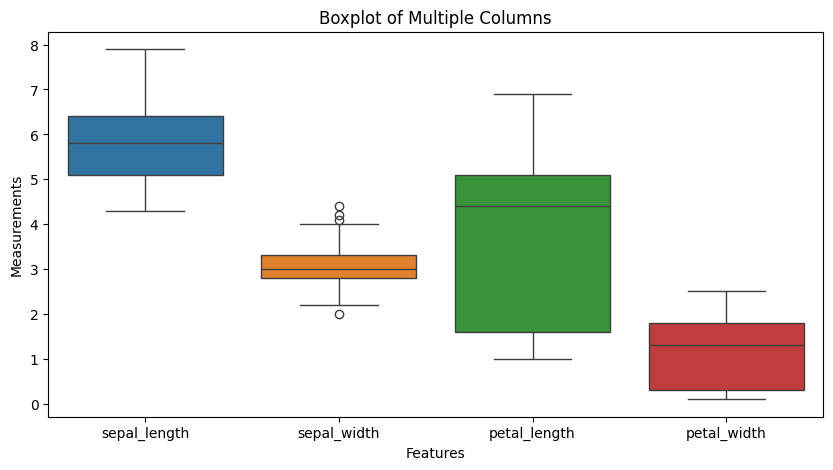

In [11]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[columns])
plt.title('Boxplot of Multiple Columns')
plt.ylabel('Measurements')
plt.xlabel('Features')
plt.show()

In [12]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

remove_outliers_iqr(df,'sepal_width')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='species', ylabel='count'>

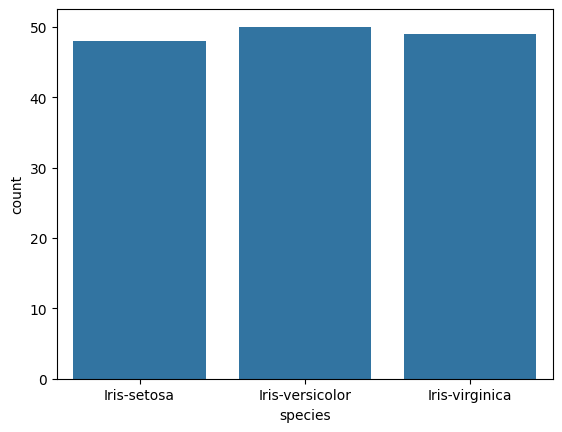

In [13]:
sns.countplot(x='species',data=df)

In [14]:
X = df.drop('species',axis = 1)
y = df['species']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.2 , random_state= 45)

In [16]:
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB()
}

8 0 0 11
Model: Gaussian Naive Bayes
Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
Evaluation Metrics:
Accuracy: 0.9666666666666667
Error Rate: 0.033333333333333326
Precision: 0.9722222222222222
Recall: 0.9696969696969697

8 0 0 11
Model: Multinomial Naive Bayes
Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
Evaluation Metrics:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0

8 0 0 0
Model: Complement Naive Bayes
Confusion Matrix:
[[ 8  0  0]
 [ 0  0 11]
 [ 0  0 11]]
Evaluation Metrics:
Accuracy: 0.6333333333333333
Error Rate: 0.3666666666666667
Precision: 0.5
Recall: 0.6666666666666666



C:\Users\Aditya Kapole\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


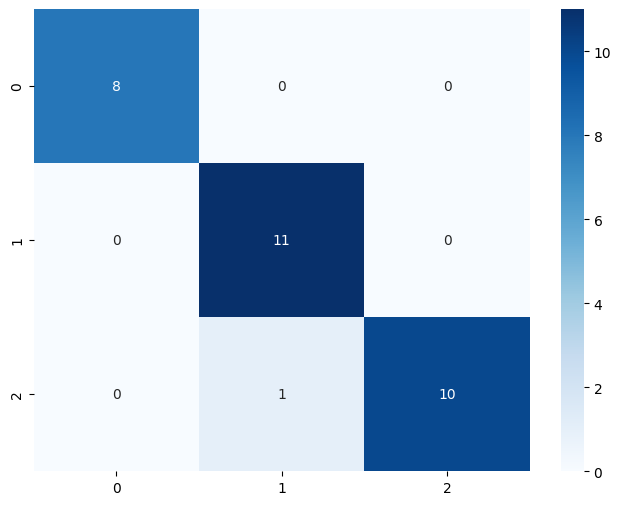

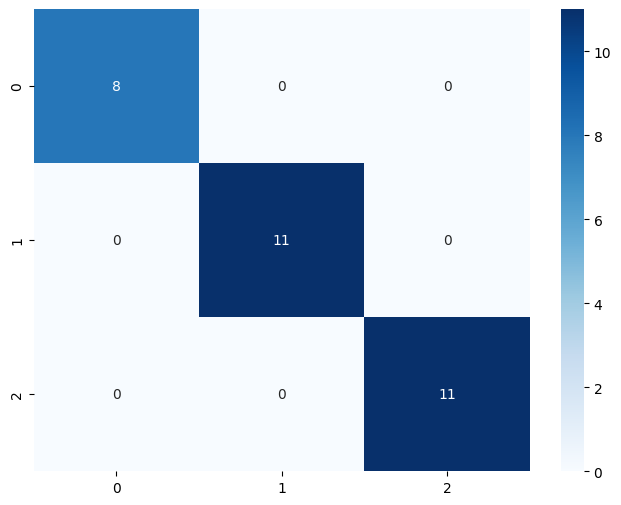

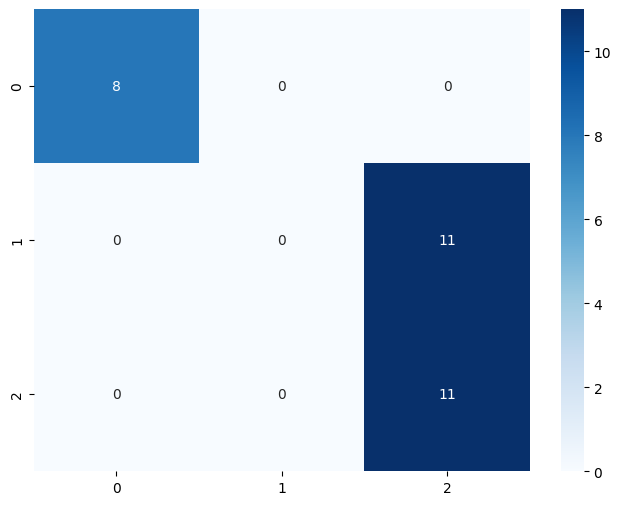

In [22]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

    # Extract TP, FP, TN, FN from confusion matrix
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    print(TP,FP,FN,TN)
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Print results
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Error Rate: {error_rate}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()


In [19]:
dd = pd.DataFrame({'y_actual': y_test, 'y_pred': y_pred})
dd

,y_actual,y_pred
71,Iris-versicolor,Iris-virginica
0,Iris-setosa,Iris-setosa
54,Iris-versicolor,Iris-virginica
132,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-virginica
111,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa
103,Iris-virginica,Iris-virginica
139,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a simple Random Forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Define the input widgets
sepal_length = widgets.FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Sepal Length:')
sepal_width = widgets.FloatSlider(value=3.0, min=2.0, max=5.0, step=0.1, description='Sepal Width:')
petal_length = widgets.FloatSlider(value=1.0, min=1.0, max=7.0, step=0.1, description='Petal Length:')
petal_width = widgets.FloatSlider(value=0.5, min=0.1, max=3.0, step=0.1, description='Petal Width:')

# Define the output widget
output = widgets.Output()

# Define the predict function
def predict(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(input_data)
    species = iris.target_names[prediction[0]]
    with output:
        output.clear_output()
        print(f'Predicted Species: {species}')

# Connect the widgets to the predict function
widgets.interactive(predict, sepal_length=sepal_length, sepal_width=sepal_width,
                    petal_length=petal_length, petal_width=petal_width)

# Display the widgets
display(sepal_length, sepal_width, petal_length, petal_width, output)


In [ ]:
def calculate_metrics(conf_matrix):
    # Calculate true positives, false positives, true negatives, and false negatives
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    tn = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    
    # Calculate accuracy
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # Calculate precision
    precision = tp / (tp + fp)
    
    # Calculate recall
    recall = tp / (tp + fn)
    
    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

# Example confusion matrix
confusion_matrix = [[100, 10], [5, 50]]  # Example values, replace with your confusion matrix

# Calculate metrics
accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model (or any other classifier)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Define a function to predict class from feature values
def predict_class(features):
    # Reshape features to match the input shape for prediction
    features = np.array(features).reshape(1, -1)
    # Predict class
    predicted_class = clf.predict(features)[0]
    # Map predicted class to class label
    predicted_label = iris.target_names[predicted_class]
    return predicted_label

# Example usage
features = [5.1, 3.5, 1.4, 0.2]  # Example feature values for an Iris flower
predicted_class = predict_class(features)
print("Predicted class:", predicted_class)
